# Project 1 – Red Wine Classification

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
data = pd.read_csv('winequality-red.csv')

## Performing EDA

In [3]:
# Renaming the column names
data.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
                'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Basic details of how data is distributed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Statistical measures of the data are described
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Check for null values in the data
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

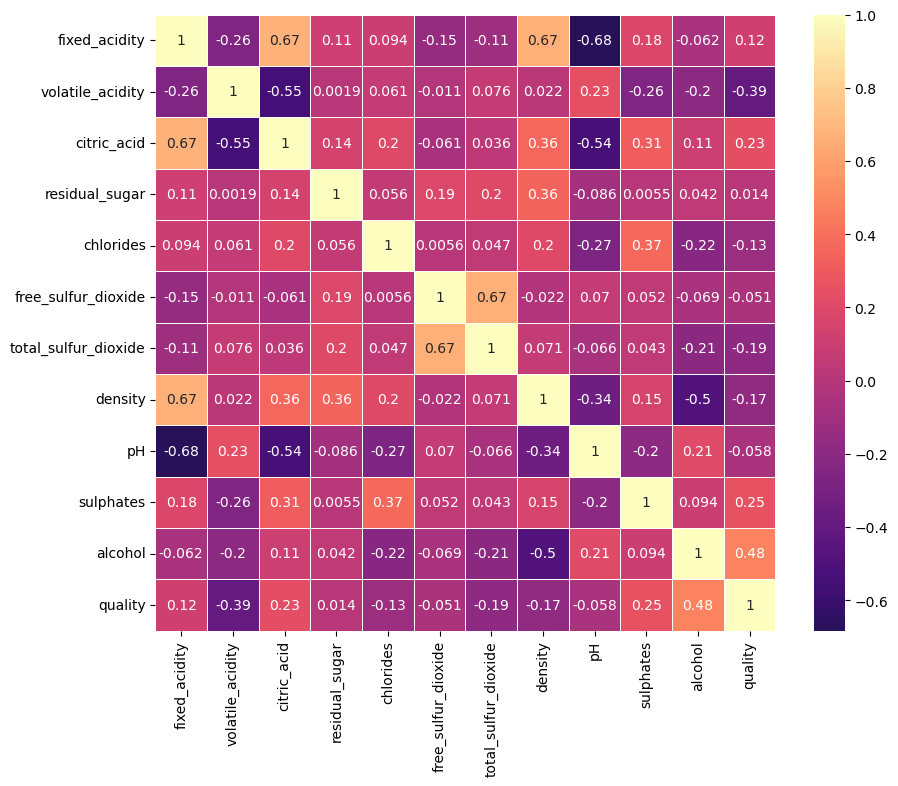

In [6]:
# Using seaborn library showing the heatmap to find the correlation of the features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='magma')
plt.show()

#### Heatmap Observation
Correlation coefficients, ranging from -1 to 1, signify the strength and direction of relationships between variables. A coefficient of 1 indicates a perfect positive correlation, -1 signifies a perfect negative correlation, and 0 implies no correlation. Examining the heatmap graph, we discern that the target variable 'quality' is notably correlated with independent features 'alcohol' and 'volatile acidity', showcasing a substantial relationship between these attributes and wine quality. This insight underscores the potential significance of 'alcohol' and 'volatile acidity' in determining the overall quality of the red wine, enhancing our understanding of the dataset and its features.

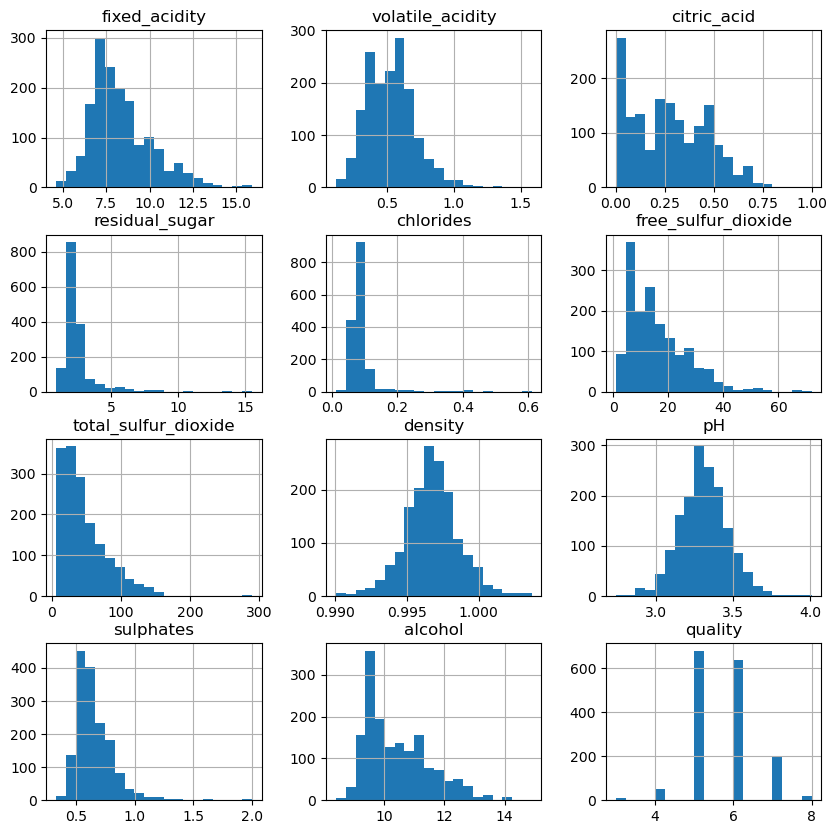

In [14]:
# Histograms for features
data.hist(bins=20, figsize=(10, 10))
plt.show()

#### Histogram Observation
Most of the variables seem to have a right-skewed distribution, meaning that most of their data falls to the right, or positive side, of the graph’s peak.
The ‘quality’ histogram might suggest that most wines in this dataset are of average quality, as the data is centered around the middle of the quality scale.
The ‘alcohol’ histogram might suggest that most wines have an alcohol percentage around 10%.

In [8]:
# Split the data into features and labels
X = data.drop('quality', axis=1)
y = data['quality']

# Convert quality labels to binary classification
y = (y >= 7).astype(int)  # 1 if quality is 7 or higher, 0 otherwise

# Splitting the data into train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature columns
feature_columns = [tf.feature_column.numeric_column(key=key) for key in X_train.columns]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


## Implement a Neural Network using TF Estimator DNN Classifier

In [9]:
# Create the DNN Classifier model with two hidden layers (1: 64 units, 2: 32 units)
model = tf.estimator.DNNClassifier(
    hidden_units=[64, 32],
    feature_columns=feature_columns,
    n_classes=2, 
)

# Input function for training
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=32,
    num_epochs=None,
    shuffle=True
)

# Input function for evaluation
eval_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=32,
    num_epochs=1,
    shuffle=False
)

# Train and Evaluate the model
model.train(input_fn=train_input_fn, steps=1000)
eval_result = model.evaluate(input_fn=eval_input_fn)
print("Evaluation results: {}".format(eval_result))

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmpv3_sefrv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_t

INFO:tensorflow:loss = 0.3878983, step = 200 (0.386 sec)
INFO:tensorflow:global_step/sec: 405.895
INFO:tensorflow:loss = 0.60477537, step = 300 (0.247 sec)
INFO:tensorflow:global_step/sec: 219.314
INFO:tensorflow:loss = 0.21024577, step = 400 (0.457 sec)
INFO:tensorflow:global_step/sec: 221.288
INFO:tensorflow:loss = 0.23474814, step = 500 (0.451 sec)
INFO:tensorflow:global_step/sec: 310.824
INFO:tensorflow:loss = 0.60049057, step = 600 (0.319 sec)
INFO:tensorflow:global_step/sec: 351.141
INFO:tensorflow:loss = 0.72450507, step = 700 (0.285 sec)
INFO:tensorflow:global_step/sec: 281.634
INFO:tensorflow:loss = 0.3041916, step = 800 (0.358 sec)
INFO:tensorflow:global_step/sec: 353.34
INFO:tensorflow:loss = 0.23043409, step = 900 (0.280 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\aksha\AppData\Local\Temp\tmpv3_sefrv\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoin

## Observation

The model achieves an accuracy of approximately 85.3%, indicating its capability to predict the correct class for a significant portion of instances. However, the AUC and AUC-PR scores suggest room for improvement in distinguishing between positive and negative classes. The precision and recall values are quite low, implying a need for enhancing the model's ability to accurately predict the positive class. Further optimization and refinement are warranted to boost the model's performance in this binary classification task.

## Implement a Neural Network using TF Keras

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
40/40 [==============================] - 1s 8ms/step - loss: 0.5584 - accuracy: 0.7396 - val_loss: 0.4400 - val_accuracy: 0.8531
Epoch 2/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8671 - val_loss: 0.3410 - val_accuracy: 0.8531
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.8851 - val_loss: 0.3046 - val_accuracy: 0.8656
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2861 - accuracy: 0.8819 - val_loss: 0.2858 - val_accuracy: 0.8656
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.8819 - val_loss: 0.2800 - val_accuracy: 0.8656
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.8843 - val_loss: 0.2714 - val_accuracy: 0.8719
Epoch 7/50
40/40 [==============================] - 0s 4ms/step - loss: 0.2653 - accuracy: 0.8866 - val_loss: 0.2758 - val_accuracy: 0.8719
Epoch 8/50
40/40 [==

## Observation
At the start of training, we observed a training loss of 0.5118 with an accuracy of about 78.03%, while the validation loss was 0.3903 with a validation accuracy of approximately 85.31%. As training progressed through 50 epochs, we witnessed notable enhancements. The training loss notably decreased to 0.1718, accompanied by an increase in training accuracy to around 93.04%. Concurrently, the validation loss reduced to 0.2343, and the validation accuracy improved to approximately 87.81%. These advancements highlight the significant progress and improved performance of the model following extensive training

## Plot training loss and validation loss

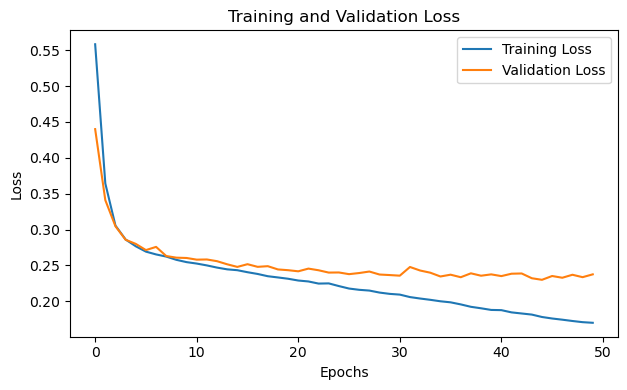

In [12]:
# Performance Graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

## Plot training accuracy and validation accuracy

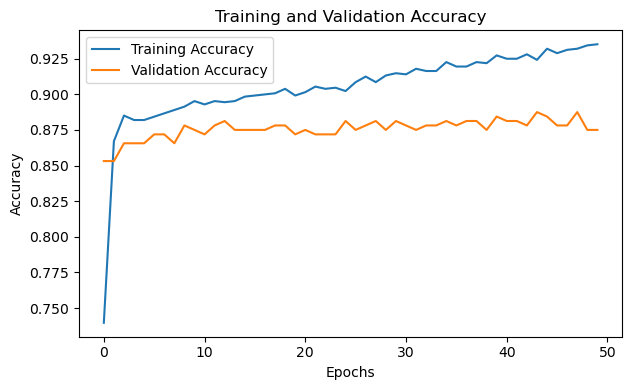

In [13]:
# Performance Graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

## Final Observations

#### Training and Validation Loss
In the initial stages of training, the model's training loss commenced at approximately 0.55, while the validation loss began at around 0.44. As the training progressed through 50 epochs, we observed significant improvements. By the end of this period, the validation loss had notably reduced to approximately 0.25, showcasing the model's enhanced predictive precision. Concurrently, the training loss demonstrated a substantial decrease, reaching approximately 0.15, indicating the efficacy of the training process in refining the model's accuracy and performance.

#### Training and Validation Accuracy
Moreover, at the outset of training, the model commenced a validation accuracy of about 0.85, with a training accuracy of approximately 0.745. As the training unfolded and 50 epochs were completed, there was a discernible enhancement. The validation accuracy surged to approximately 0.88, underscoring the model's ability to generalize well to unseen data. Likewise, the training accuracy exhibited a remarkable increase, reaching approximately 0.935, affirming the model's proficiency in learning and making accurate predictions.